In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

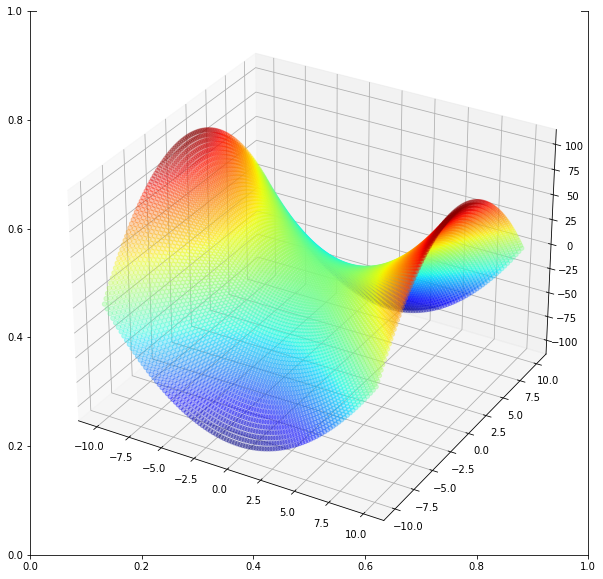

In [3]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)
X1, X2 = np.meshgrid(x1, x2)
def saddle(x1,x2):
    return x1**2 - x2**2
Y = saddle(X1,X2)


fig, ax = plt.subplots(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X1,X2,Y, c = Y, cmap = plt.cm.jet, vmin = Y.min(), vmax = Y.max(), alpha = .3)

In [6]:
class Vis(object):
    def __init__(self, eta = .0075, n_iter = 150, random_state = 42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.x = np.array([10.,0.01])
        self.history_x_ = []
        self.history_y_ = []
        
    def predict(self, x):
        return x[0]**2. - x[1]**2.
    def gradient(self, x):
        return np.array([2 * x[0], -2 * x[1]])
    
    def fit(self, momentum:bool = False, alpha = .9, nesterov = False, adagrad=False, rmsprop = False, rho = .9, adam = False, beta1 = .9, beta2 = .95, nadam = False):
        self.nadam = nadam
        self.adam = adam
        self.beta1 = beta1
        self.beta2 = beta2
        self.rmsprop = rmsprop
        self.rho = rho
        self.adagrad = adagrad
        self.nesterov = nesterov
        self.momentum = momentum
        self.alpha = alpha
        self.v_ = np.array([0., 0.])
        self.g_ = np.array([0., 0.])
        self.gradient_ = []
        self.gradient_.append([0., 0.])
        for _ in range(self.n_iter):
            self.history_x_.append(self.x)
            self.history_y_.append(self.predict(self.x))
            
            if self.nesterov:
                pass
            else:
                self.gradient_.append(self.gradient(self.x))
            
            if self.nadam:
                self.seta = self.x + (self.eta * self.v_)
                self.v_ = self.beta1 * self.v_ + (1 - self.beta1)*(self.gradient(self.seta))
                self.v_v_ = self.v_ / (1. - self.beta1)
                self.g_ = self.beta2 * self.g_ + (1. - self.beta2)*(self.gradient_[-1]**2)
                self.g_v_ = self.g_ / (1. - self.beta2)
                self.x = self.x - (self.eta * (self.v_v_ / np.sqrt(self.g_v_ + 1e-05)))
            elif self.adam:
                self.v_ = self.beta1 * self.v_ + (1. - self.beta1)*self.gradient_[-1]
                self.v_v_ = self.v_ / (1. - self.beta1)
                self.g_ = self.beta2 * self.g_ + (1. - self.beta2)*(self.gradient_[-1]**2)
                self.g_v_ = self.g_ / (1. - self.beta2)
                self.x = self.x - (self.eta * (self.v_v_ / np.sqrt(self.g_v_ + 1e-05)))
            elif self.rmsprop:
                self.g_ = self.rho * self.g_ + (1 - self.rho) * self.gradient_[-1]**2
                self.x = self.x - (self.eta * (self.gradient_[-1] / (np.sqrt(self.g_) + 1e-05)))
            elif self.adagrad:
                self.g_ = self.g_ + self.gradient_[-1]**2
                self.x = self.x - (self.eta * (self.gradient_[-1] / (np.sqrt(self.g_) + 1e-05)))
            elif self.nesterov:
                self.seta = self.x + (self.alpha * self.v_)
                self.v_ = (self.alpha * self.v_) - (self.eta * self.gradient(self.seta))
                self.x = self.x + self.v_
            elif self.momentum:
                self.v_ = (self.alpha * self.v_) - (self.eta * self.gradient_[-1])
                self.x = self.x + self.v_
            else:    
                self.x = self.x - (self.eta * self.gradient_[-1])
            
        return self

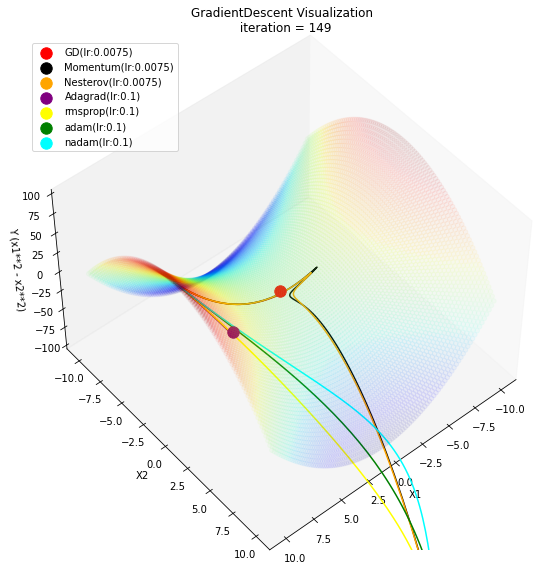

In [7]:
vis = Vis()
vis.fit()
x = np.row_stack([x for x in vis.history_x_])
y = np.row_stack([x for x in vis.history_y_])
y = y.T[0]

vis2 = Vis()
vis2.fit(momentum=True)
x2 = np.row_stack([x for x in vis2.history_x_])
y2 = np.row_stack([x for x in vis2.history_y_])
y2 = y2.T[0]

vis3 = Vis()
vis3.fit(nesterov=True)
x3 = np.row_stack([x for x in vis3.history_x_])
y3 = np.row_stack([x for x in vis3.history_y_])
y3 = y3.T[0]

vis4 = Vis(eta =.1)
vis4.fit(adagrad=True)
x4 = np.row_stack([x for x in vis4.history_x_])
y4 = np.row_stack([x for x in vis4.history_y_])
y4 = y4.T[0]

vis5 = Vis(eta = .1)
vis5.fit(rmsprop=True)
x5 = np.row_stack([x for x in vis5.history_x_])
y5 = np.row_stack([x for x in vis5.history_y_])
y5 = y5.T[0]

vis6 = Vis(eta = .1)
vis6.fit(adam=True)
x6 = np.row_stack([x for x in vis6.history_x_])
y6 = np.row_stack([x for x in vis6.history_y_])
y6 = y6.T[0]

vis7 = Vis(eta = .1)
vis7.fit(nadam=True)
x7 = np.row_stack([x for x in vis7.history_x_])
y7 = np.row_stack([x for x in vis7.history_y_])
y7 = y7.T[0]

###

time_steps = 150

fig, ax = plt.subplots(figsize = (10, 10))
marker_size = 25 

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111, projection = '3d')
    ax.set_xlim(X1.min()-1, X1.max() + 1)
    ax.set_ylim(X2.min()-1, X2.max() + 1)
    ax.set_zlim(Y.min()-1, Y.max() + 1)
    ax.view_init(50, 50)
    ax.grid(b = None)
    ax.set_title('GradientDescent Visualization \n iteration = %d' % i)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y (x1**2 - x2**2)')
    ax.scatter(X1, X2, Y, c = Y, cmap = plt.cm.jet,  edgecolor = None, alpha = .05)
    ax.plot(x[:i,0], x[:i,1], y[:i], c = 'red')
    ax.scatter(vis.history_x_[i][0], vis.history_x_[i][1], vis.history_y_[i] + 5, s = 130, c = 'red', label = f'GD(lr:{vis.eta})')
    ax.plot(x2[:i,0], x2[:i,1], y2[:i], c = 'black')
    ax.scatter(vis2.history_x_[i][0], vis2.history_x_[i][1], vis2.history_y_[i] + 5, s = 130, c = 'black', label = f'Momentum(lr:{vis2.eta})')
    ax.plot(x3[:i,0], x3[:i,1], y3[:i], c = 'orange')
    ax.scatter(vis3.history_x_[i][0], vis3.history_x_[i][1], vis3.history_y_[i] + 5, s = 130, c = 'orange', label = f'Nesterov(lr:{vis3.eta})')
    ax.plot(x4[:i,0], x4[:i,1], y4[:i], c = 'purple')
    ax.scatter(vis4.history_x_[i][0], vis4.history_x_[i][1], vis4.history_y_[i] + 5, s = 130, c = 'purple', label = f'Adagrad(lr:{vis4.eta})')
    ax.plot(x5[:i,0], x5[:i,1], y5[:i], c = 'yellow')
    ax.scatter(vis5.history_x_[i][0], vis5.history_x_[i][1], vis5.history_y_[i] + 5, s = 130, c = 'yellow', label = f'rmsprop(lr:{vis5.eta})')
    ax.plot(x6[:i,0], x6[:i,1], y6[:i], c = 'green')
    ax.scatter(vis6.history_x_[i][0], vis6.history_x_[i][1], vis6.history_y_[i] + 5, s = 130, c = 'green', label = f'adam(lr:{vis6.eta})')
    ax.plot(x7[:i,0], x7[:i,1], y7[:i], c = 'cyan')
    ax.scatter(vis7.history_x_[i][0], vis7.history_x_[i][1], vis7.history_y_[i] + 5, s = 130, c = 'cyan', label = f'nadam(lr:{vis7.eta})')
    ax.legend()
    
plt.tight_layout()
fig.subplots_adjust(top=.75)

ani = animation.FuncAnimation(fig, animate, interval=30, frames=range(time_steps))

ani.save('GradientDescentVisualziation.gif', writer='pillow', dpi=100)